In [33]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt 
import os
import random as rd

In [34]:
def UGDG(m,v):
    x=0
    for i in range(12):
        x+=rd.uniform(0,1)
    x-=6 # standard normal distribution N(0,1)
    x=m+x*ma.sqrt(v) # from N(0,1) to N(m,v)
    return x

# Matrix_inverse

In [35]:
# LU decomposition
def LU(A,n):
    L=np.zeros((n,n))
    U=np.identity(n) # Diagonal of U is all 1
    for i in range(0,n): # First column of L is A's
        L[i][0]=A[i][0]
    for j in range(1,n): # From assumption, we can obtain the first row of U
        U[0][j]=A[0][j]/L[0][0]
    for i in range(1,n):
        for j in range(1,i+1): # We can use the terms we have known to find other terms.
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            L[i][j]=A[i][j]-s
        for j in range(i+1,n):
            s=0
            for k in range(0,j):
                s+=L[i][k]*U[k][j]
            U[i][j]=(A[i][j]-s)/L[i][i]
    return L,U,L@U

In [36]:
def lin_eq(L,U,b,n): # LUx=b
    y=np.zeros((n,1)) # Ly=b, solve y
    x=np.zeros((n,1)) # Ux=y, solve x
    for i in range(0,n):
        s=0
        for j in range(0,i):
            s+=L[i][j]*y[j][0]
        y[i][0]=(b[i][0]-s)/L[i][i]
    for i in range(0,n):
        r=n-1
        s=0
        for j in range(0,i):
            s+=U[r-i][r-j]*x[r-j][0]
        x[r-i][0]=(y[r-i][0]-s)/U[r-i][r-i]
    return x

In [37]:
def Matrix_inverse(A,n):
    L,U,X=LU(A,n)
    A_inv=np.zeros((n,n))
    for i in range(0,n): # Use Ax=e_i for all i=1~n to obtain A^-1
        b=np.zeros((n,1))
        b[i][0]=1
        x=lin_eq(L,U,b,n)
        for j in range(0,n):
            A_inv[j][i]=x[j][0]
    return A_inv

#Logistic regression

In [46]:
N=int(input('The number of data:'))
mx1,vx1=int(input('Parameter mean of x1:')),int(input('Parameter variance of x1:'))
my1,vy1=int(input('Parameter mean of y1:')),int(input('Parameter variance of y1:'))
mx2,vx2=int(input('Parameter mean of x2:')),int(input('Parameter variance of x2:'))
my2,vy2=int(input('Parameter mean of y2:')),int(input('Parameter variance of y2:'))

The number of data:50
Parameter mean of x1:1
Parameter variance of x1:2
Parameter mean of y1:1
Parameter variance of y1:2
Parameter mean of x2:3
Parameter variance of x2:4
Parameter mean of y2:3
Parameter variance of y2:4


In [47]:
D1x=np.zeros((N,1))
D1y=np.zeros((N,1))
D2x=np.zeros((N,1))
D2y=np.zeros((N,1))
for i in range(N):
    D1x[i][0]=UGDG(mx1,vx1)
    D1y[i][0]=UGDG(my1,vy1)
    D2x[i][0]=UGDG(mx2,vx2)
    D2y[i][0]=UGDG(my2,vy2)

In [48]:
def Cluster(w):
    f=A@w
    R=[]
    B=[]
    for j in range(2*N):
        if -f[j][0]<100:
            if 1/(1+np.exp(-f[j][0]))>0.5:
                R.append(int(j))
            else:
                B.append(int(j))
        else:
            B.append(int(j))
    RX=np.zeros(len(R))
    RY=np.zeros(len(R))
    for i in range(len(R)):
        RX[i]=A[R[i]][1]
        RY[i]=A[R[i]][2]
    BX=np.zeros(len(B))
    BY=np.zeros(len(B))
    for i in range(len(B)):
        BX[i]=A[B[i]][1]
        BY[i]=A[B[i]][2]
    return R,B,RX,RY,BX,BY

In [49]:
def ans(w,R,B):
    T1=0
    T2=0
    for i in range(N):
        if R.count(i)>0:
            T1+=1
    for i in range(N):
        if B.count(i+N)>0:
            T2+=1
    print('w:')
    for i in range(3):
        print(w[i][0])
    print()
    print('Confusion Matrix:')
    print('             Predict cluster 1    Predict cluster 2')
    print('Is cluster 1         %2.d                   %2.d'%(T1,N-T1))
    print('Is cluster 2         %2.d                   %2.d'%(N-T2,T2))
    print()
    print('Sensitivity (Successfully predict cluster 1):',T1/N)
    print('Specificity (Successfully predict cluster 2):',T2/N)

In [50]:
def print_graph(X1,Y1,X2,Y2):
    plt.scatter(X1,Y1,c='r')
    plt.scatter(X2,Y2,c='b')

In [60]:
w1=np.zeros((3,1))
Y=np.zeros((2*N,1))
A=np.zeros((2*N,3))
for i in range(N):
    Y[i][0]=1
for i in range(2*N):
    A[i][0]=1
    if i<N:
        A[i][1]=D1x[i][0]
        A[i][2]=D1y[i][0]
    else:
        A[i][1]=D2x[i-N][0]
        A[i][2]=D2y[i-N][0]
t=0
lamb=1/3 # learning rate
while 1:
    t+=1
    w1_old=np.copy(w1)
    f=A@w1
    g=np.zeros((2*N,1))
    for j in range(2*N):
        if -f[j][0]>100: # Too big -> overflow see as 1/inf=0
            g[j][0]=-Y[j][0]
        else:
            g[j][0]=1/(1+np.exp(-f[j][0]))-Y[j][0]
    w1-=lamb*A.transpose()@g # Gradient descent method
    error=abs(w1_old.sum()-w1.sum())
    if error<10**-3 or t>=50:
        break
R1,B1,R1X,R1Y,B1X,B1Y=Cluster(w1)

In [52]:
w2=np.zeros((3,1))
t=0
while 1:
    t+=1
    w2_old=np.copy(w2)
    f=A@w2
    g=np.zeros((2*N,1))
    for j in range(2*N):
        if -f[j][0]>100: # Too big -> overflow see as 1/inf=0
            g[j][0]=-Y[j][0]
        else:
            g[j][0]=1/(1+np.exp(-f[j][0]))-Y[j][0]
    D=np.zeros((2*N,2*N))
    for j in range(2*N):
        x=0
        for k in range(3):
            x+=A[j][k]*w2[k][0]
        x=1+np.exp(-x)
        D[j][j]=(1/x)/(1-1/x)
    H=A.transpose()@D@A
    w2-=Matrix_inverse(H,3)@A.transpose()@g # Newton's method
    error=abs(w2_old.sum()-w2.sum())
    if error<10**-3 or t>=50:
        break
R2,B2,R2X,R2Y,B2X,B2Y=Cluster(w2)

Gradient descent:

w:
48.152959493351375
-2.956807966948798
-12.52666897911821

Confusion Matrix:
             Predict cluster 1    Predict cluster 2
Is cluster 1         48                    2
Is cluster 2         25                   25

Sensitivity (Successfully predict cluster 1): 0.96
Specificity (Successfully predict cluster 2): 0.5
---------------------------------------------------------------
Newton's method:

w:
1.9647504837558265
-0.40789832675165044
-0.6986574697530903

Confusion Matrix:
             Predict cluster 1    Predict cluster 2
Is cluster 1         40                   10
Is cluster 2          6                   44

Sensitivity (Successfully predict cluster 1): 0.8
Specificity (Successfully predict cluster 2): 0.88



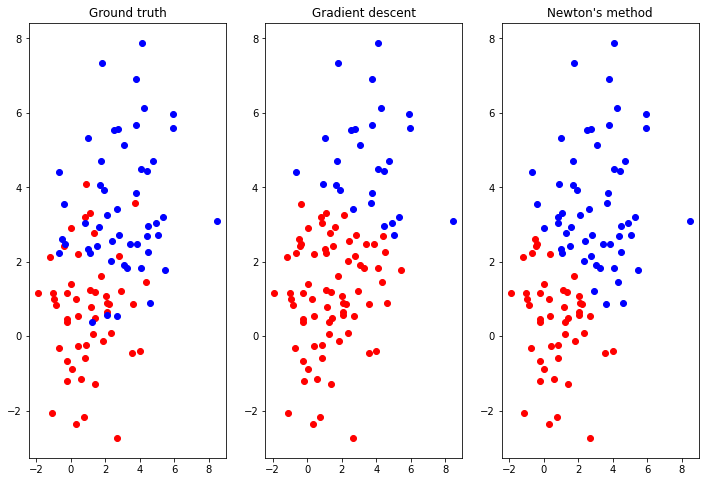

In [61]:
print('Gradient descent:')
print()
ans(w1,R1,B1)
print('---------------------------------------------------------------')
print('Newton\'s method:')
print()
ans(w2,R2,B2)
print()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Ground truth')
print_graph(D1x,D1y,D2x,D2y)
plt.subplot(132)
plt.title('Gradient descent')
print_graph(R1X,R1Y,B1X,B1Y)
plt.subplot(133)
plt.title('Newton\'s method')
print_graph(R2X,R2Y,B2X,B2Y)